In [1]:
import json
import pandas as pd
from pathlib import Path 
import plot_utils
import matplotlib.pyplot as plt


from importlib import reload
reload(plot_utils)

plot_utils.set_style()


In [2]:
ftype = '.pdf'
save_dir = Path('figs_garibsingh')
save_dir.mkdir(exist_ok=True)

In [3]:
def scatter_plot_2d(x, y, z, xlabel='', ylabel='', zlabel='', c=0):
    maps = [plt.cm.get_cmap('PRGn_r'), plt.cm.get_cmap('coolwarm'), plt.cm.get_cmap('PiYG')]
    # plt.cm.get_cmap('RdYlBu')
    fig, ax = plt.subplots(1,1)
    cm = maps[c]
    sc = plt.scatter(x, y, c=z, s=35, cmap=cm, edgecolor='k', linewidth=0.5)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plot_utils.set_size(1.5, 1.2, ax=ax)
    cbar = plt.colorbar(sc)
    cbar.set_label(zlabel)
    return ax, fig

## Vary $\lambda_1$


In [20]:
result_dir = Path('../results/garibsingh_rewvary')
summaries = []
for dir in sorted(list(result_dir.glob('lam*'))): 
    with open(dir/'summary.json', 'r') as f:
        summ = json.load(f)
    
    l1, l2, l3 = summ.pop('Weights')
    summ['Reward Weight'] = l1
    summ['Starting Material Weight'] = l2
    summ['Reaction Weight'] = l3

    summaries.append(summ)

df = pd.DataFrame.from_dict(summaries)
df = df.sort_values('Reward Weight')
df.to_csv('csv_table.csv')
df


,Number targets,Fraction targets,Total reward,Possible reward,Number starting materials,Cost starting materials,Number reaction steps,Average reaction score,Reward Weight,Starting Material Weight,Reaction Weight
0,0,0.000000,0.000000,6.247765,0,0.0,0,NaN,2.0,1.0,1.0
1,1,0.071429,1.000000,6.247765,2,1.3,3,0.893510,5.0,1.0,1.0
3,3,0.214286,2.239944,6.247765,5,3.8,8,0.913835,8.0,1.0,1.0
4,5,0.357143,3.315363,6.247765,8,9.3,16,0.963189,12.5,1.0,1.0
5,7,0.500000,4.257263,6.247765,12,12.7,24,0.953867,15.0,1.0,1.0
6,8,0.571429,4.736872,6.247765,14,13.9,29,0.934677,20.0,1.0,1.0
7,9,0.642857,5.031006,6.247765,16,19.1,31,0.932145,30.0,1.0,1.0
8,11,0.785714,5.612849,6.247765,19,21.4,39,0.870510,50.0,1.0,1.0
9,12,0.857143,6.173743,6.247765,21,23.5,45,0.851221,60.0,1.0,1.0
10,13,0.928571,6.247765,6.247765,22,24.3,47,0.842310,70.0,1.0,1.0


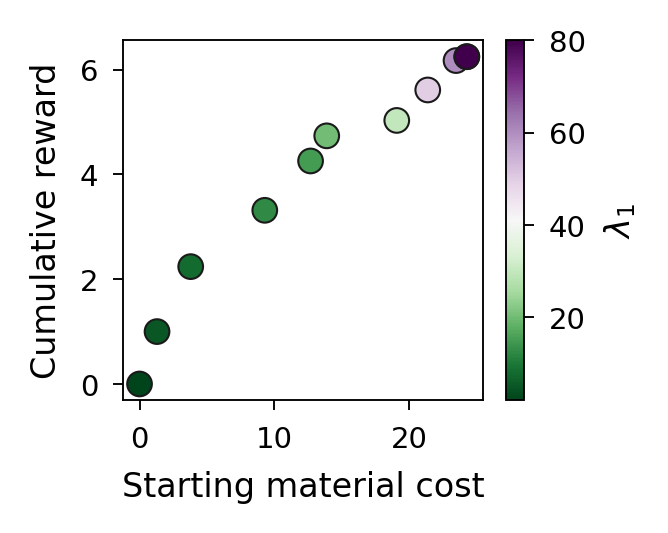

In [21]:
ax, fig = scatter_plot_2d(
    x=df['Cost starting materials'], 
    y=df['Total reward'], 
    z=df['Reward Weight'],
    xlabel='Starting material cost',
    ylabel='Cumulative reward',
    zlabel='$\\lambda_1$', 
    c=0
)
fig.savefig(save_dir/f'lam1_cost_rew{ftype}',bbox_inches='tight', dpi=200, transparent=True)

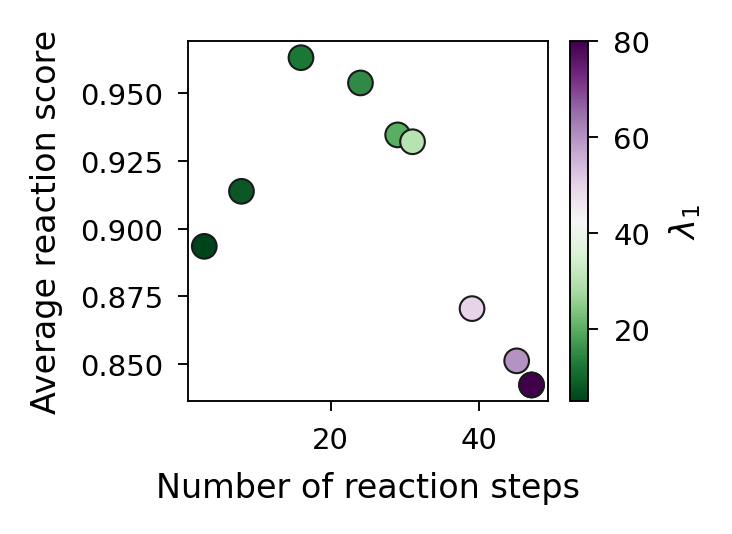

In [22]:
ax, fig = scatter_plot_2d(
    x=df['Number reaction steps'], 
    y=df['Average reaction score'], 
    z=df['Reward Weight'],
    xlabel='Number of reaction steps',
    ylabel='Average reaction score',
    zlabel='$\\lambda_1$',
    c=0,
)
fig.savefig(save_dir/f'lam1_nsteps_rxnscore{ftype}',bbox_inches='tight', dpi=200, transparent=True)

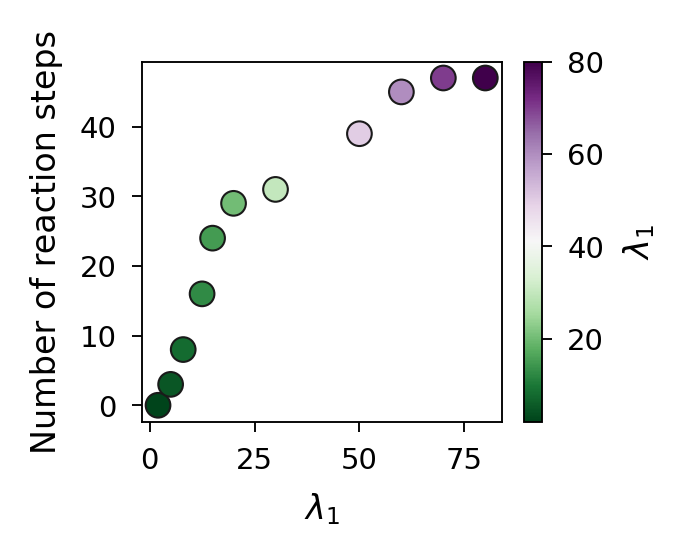

In [23]:
ax, fig = scatter_plot_2d(
    x=df['Reward Weight'], 
    y=df['Number reaction steps'], 
    z=df['Reward Weight'],
    xlabel='$\\lambda_1$',
    ylabel='Number of reaction steps',
    zlabel='$\\lambda_1$',
    c=0
)
fig.savefig(save_dir/f'lam1_nsteps{ftype}',bbox_inches='tight', dpi=200, transparent=True)

## Vary $\lambda_2$

In [24]:
result_dir = Path('../results/garibsingh_costvary')
summaries = []
for dir in sorted(list(result_dir.glob('lam*'))): 
    with open(dir/'summary.json', 'r') as f:
        summ = json.load(f)
    
    l1, l2, l3 = summ.pop('Weights')
    summ['Reward Weight'] = l1
    summ['Starting Material Weight'] = l2
    summ['Reaction Weight'] = l3

    summaries.append(summ)

df = pd.DataFrame.from_dict(summaries)
df = df.sort_values('Starting Material Weight')
df.to_csv('csv_table.csv')
df

,Number targets,Fraction targets,Total reward,Possible reward,Number starting materials,Cost starting materials,Number reaction steps,Average reaction score,Reward Weight,Starting Material Weight,Reaction Weight
0,10,0.714286,5.220391,6.247765,17,22.9,34,0.937469,20.0,0.20,1.0
1,9,0.642857,5.031006,6.247765,16,19.1,31,0.932145,20.0,0.35,1.0
3,8,0.571429,4.736872,6.247765,14,13.9,29,0.934677,20.0,0.70,1.0
4,7,0.500000,4.257263,6.247765,12,12.7,24,0.953867,20.0,1.30,1.0
5,7,0.500000,4.257263,6.247765,12,12.7,24,0.953867,20.0,2.00,1.0
6,6,0.428571,3.605028,6.247765,9,9.1,19,0.921017,20.0,2.50,1.0
7,5,0.357143,3.181844,6.247765,8,7.1,16,0.925123,20.0,3.00,1.0
8,3,0.214286,2.239944,6.247765,5,3.8,8,0.913835,20.0,3.50,1.0
9,2,0.142857,1.638268,6.247765,3,1.9,6,0.905295,20.0,6.00,1.0
10,2,0.142857,1.638268,6.247765,3,1.9,6,0.905295,20.0,12.00,1.0


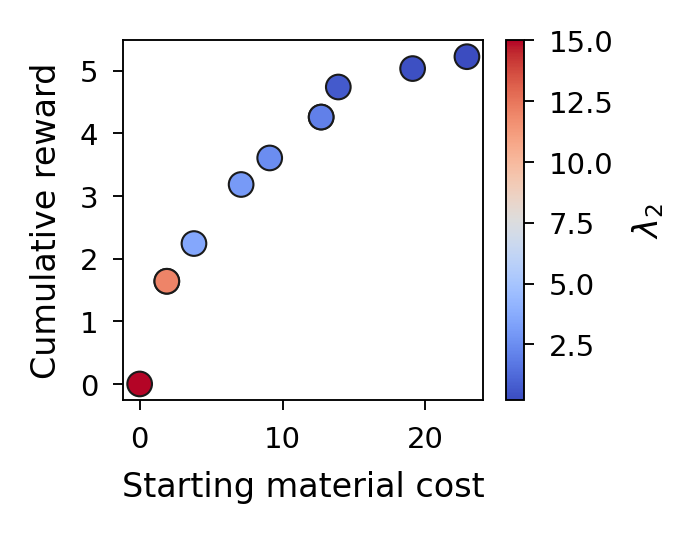

In [25]:
from matplotlib.ticker import MaxNLocator

ax, fig = scatter_plot_2d(
    x=df['Cost starting materials'], 
    y=df['Total reward'], 
    z=df['Starting Material Weight'],
    xlabel='Starting material cost',
    ylabel='Cumulative reward',
    zlabel='$\\lambda_2$',
    c=1
)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.savefig(save_dir/f'lam2_cost_rew{ftype}',bbox_inches='tight', dpi=200, transparent=True)

## Vary $\lambda_3$

In [27]:
result_dir = Path('../results/garibsingh_rxnvary')
summaries = []
for dir in sorted(list(result_dir.glob('lam*'))): 
    with open(dir/'summary.json', 'r') as f:
        summ = json.load(f)
    
    l1, l2, l3 = summ.pop('Weights')
    summ['Reward Weight'] = l1
    summ['Starting Material Weight'] = l2
    summ['Reaction Weight'] = l3

    summaries.append(summ)

df = pd.DataFrame.from_dict(summaries)
df = df.sort_values('Reaction Weight')
df

,Number targets,Fraction targets,Total reward,Possible reward,Number starting materials,Cost starting materials,Number reaction steps,Average reaction score,Reward Weight,Starting Material Weight,Reaction Weight
0,13,0.928571,6.247765,6.247765,18,18.7,48,0.786410,20.0,1.0,0.10
1,12,0.857143,6.173743,6.247765,20,21.3,48,0.847459,20.0,1.0,0.25
3,11,0.785714,5.612849,6.247765,18,19.2,42,0.864834,20.0,1.0,0.35
4,9,0.642857,4.926257,6.247765,15,14.4,33,0.922416,20.0,1.0,0.50
5,8,0.571429,4.736872,6.247765,14,13.9,29,0.934677,20.0,1.0,1.00
6,7,0.500000,4.257263,6.247765,12,12.7,24,0.953867,20.0,1.0,1.50
7,7,0.500000,4.257263,6.247765,12,12.7,24,0.953867,20.0,1.0,1.70
8,5,0.357143,3.315363,6.247765,8,9.3,16,0.963189,20.0,1.0,2.00
9,3,0.214286,2.239944,6.247765,5,3.8,8,0.913835,20.0,1.0,3.00
10,2,0.142857,1.601676,6.247765,4,3.2,5,0.911887,20.0,1.0,4.00


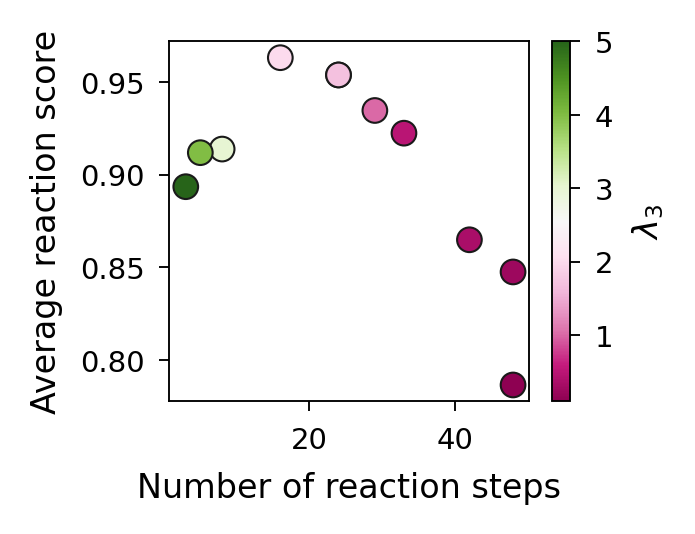

In [28]:
ax, fig = scatter_plot_2d(
    x=df['Number reaction steps'], 
    y=df['Average reaction score'], 
    z=df['Reaction Weight'],
    xlabel='Number of reaction steps',
    ylabel='Average reaction score',
    zlabel='$\\lambda_3$',
    c=2
)
fig.savefig(save_dir/f'lam3_nsteps_score{ftype}',bbox_inches='tight', dpi=200, transparent=True)

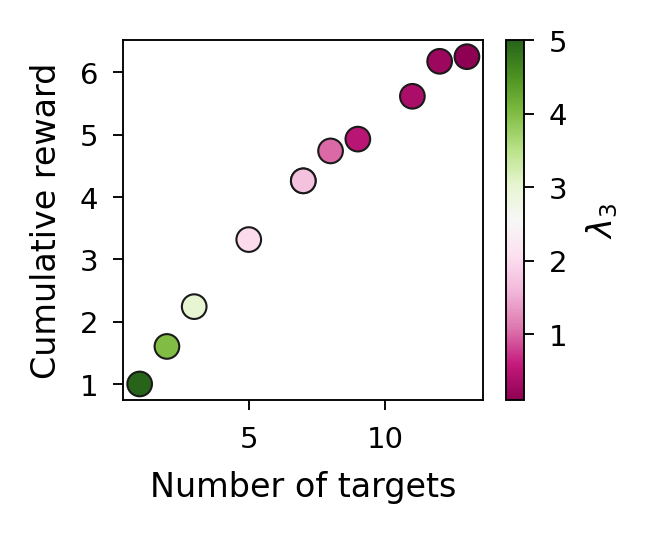

In [29]:
ax, fig = scatter_plot_2d(
    x=df['Number targets'], 
    y=df['Total reward'], 
    z=df['Reaction Weight'],
    xlabel='Number of targets',
    ylabel='Cumulative reward',
    zlabel='$\\lambda_3$',
    c=2
)
fig.savefig(save_dir/f'lam3_ntar_rew{ftype}',bbox_inches='tight', dpi=200, transparent=True)